# Support Vector Machines-1

**Q1. What is the mathematical formula for a linear SVM?**

Linear SVM: In its simplest form, The mathematical formula for a linear Support Vector Machine (SVM) is:
w^T * x + b = 0
Where:

w: weight vector perpendicular to the hyperplane
x: input feature vector
b: bias term

**Q2. What is the objective function of a linear SVM?**

The objective function of a linear SVM is to maximize the margin between the separating hyperplane and the closest data points (support vectors) from each class while minimizing classification errors. Mathematically, it can be formulated as a constrained optimization problem.

**Q3. What is the kernel trick in SVM?**

The kernel trick is a mathematical technique used to implicitly map data into a higher-dimensional space without explicitly computing the coordinates. This allows SVMs to handle non-linearly separable data. Common kernels include linear, polynomial, radial basis function (RBF), and sigmoid.

**Q4. What is the role of support vectors in SVM? Explain with example.**

Support vectors are the data points that lie closest to the decision boundary (hyperplane). They play a crucial role in defining the hyperplane.   

Example: Consider a dataset with two classes, and the SVM finds a separating hyperplane. The data points closest to this hyperplane are the support vectors. Removing non-support vectors would not change the position of the hyperplane.

**Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?**

Hyperplane: The decision boundary that separates the data points into different classes.

Marginal planes: Two parallel hyperplanes that define the maximum margin, with support vectors lying on them.

Soft margin: Allows for some misclassifications to improve generalization.

Hard margin: Assumes perfect separation of data points.

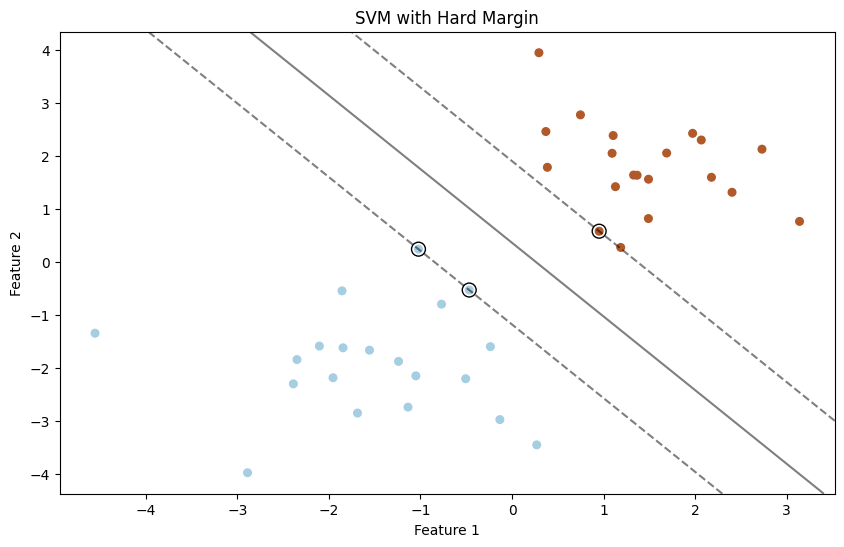

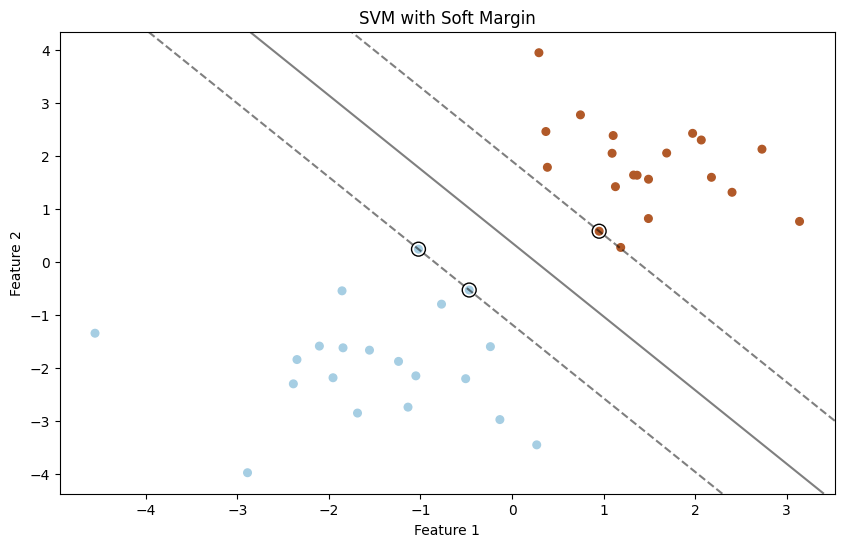

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

clf_hard = svm.SVC(kernel='linear', C=1e10)
clf_hard.fit(X, Y)

clf_soft = svm.SVC(kernel='linear', C=1.0)
clf_soft.fit(X, Y)

def plot_svm(clf, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_svm(clf_hard, "SVM with Hard Margin")

plot_svm(clf_soft, "SVM with Soft Margin")

**Q6. SVM Implementation through Iris dataset.**

This code demonstrates how to load the Iris dataset, split it into training and testing sets, train a linear SVM classifier, compute accuracy, and visualize the decision boundaries. It also shows how to experiment with different regularization parameters (C).

In [3]:
pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Accuracy: 1.0


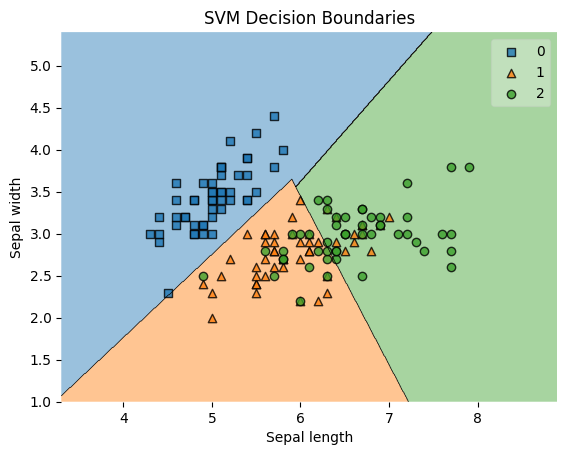

Accuracy for C = 0.1 : 1.0
Accuracy for C = 1 : 1.0
Accuracy for C = 10 : 0.9777777777777777


In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear SVM classifier
svm = SVC(kernel='linear')

# Train the model
svm.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize decision boundaries (for two features)
from sklearn.datasets import make_blobs
from mlxtend.plotting import plot_decision_regions

# Assuming two features (e.g., sepal length and sepal width)
X_plot = X[:, :2]

# Create a SVM classifier
svm_plot = SVC(kernel='linear')
svm_plot.fit(X_plot, y)

# Plot the decision boundaries
plot_decision_regions(X_plot, y, clf=svm_plot)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries')
plt.show()

# Try different values of C (regularization parameter)
C_values = [0.1, 1, 10]
for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy for C =", C, ":", accuracy)
